In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scipy

In [2]:
t, l, m, g = smp.symbols('t l m g')

In [3]:
thet = smp.symbols(r'\theta', cls=smp.Function)

In [4]:
thet = thet(t)

In [5]:
thet_d = smp.diff(thet, t)
thet_dd = smp.diff(thet_d, t)

In [6]:
T = m * l**2 * thet_d**2 / 2
V = -m * g * l * smp.cos(thet)

In [7]:
L = T - V

In [8]:
L

g*l*m*cos(\theta(t)) + l**2*m*Derivative(\theta(t), t)**2/2

In [9]:
L_thet = smp.diff(L, thet)
L_thet_d = smp.diff(L, thet_d)

In [10]:
# Lagrangian eq: left hand side
Le_lhs = L_thet - smp.diff(L_thet_d, t)

In [11]:
Le_lhs

-g*l*m*sin(\theta(t)) - l**2*m*Derivative(\theta(t), (t, 2))

In [12]:
thet_dd_rhs = smp.solve(Le_lhs, thet_dd)[0]

In [13]:
thet_dd_rhs

-g*sin(\theta(t))/l

$\vec{S}(t) = (\theta(t), \dot{\theta(t)})$

In [14]:
thet_dd_rhs_f = smp.lambdify([thet, g, l], thet_dd_rhs, 'numpy')

In [20]:
def dsdt(S, t, g, l) -> list[float]:
    return [
        S[1],
        thet_dd_rhs_f(S[0], g, l)
    ]

In [41]:
g_val = 9.81
l_val = 1
S_0 = [np.pi - 0.01, 0.]
ts = np.linspace(0., 40., 1001)
soln = scipy.integrate.odeint(dsdt, S_0, ts, args=(g_val, l_val))

In [42]:
theta, theta_d = soln.T

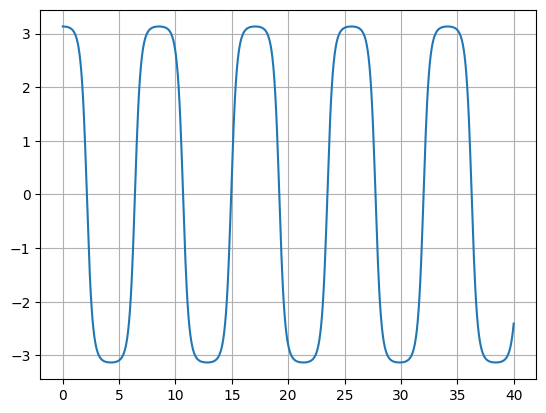

In [43]:
plt.plot(ts, theta); plt.grid()

In [45]:
from matplotlib.animation import FuncAnimation
FRAMERATE = len(ts[ts<1])
print(FRAMERATE)

25


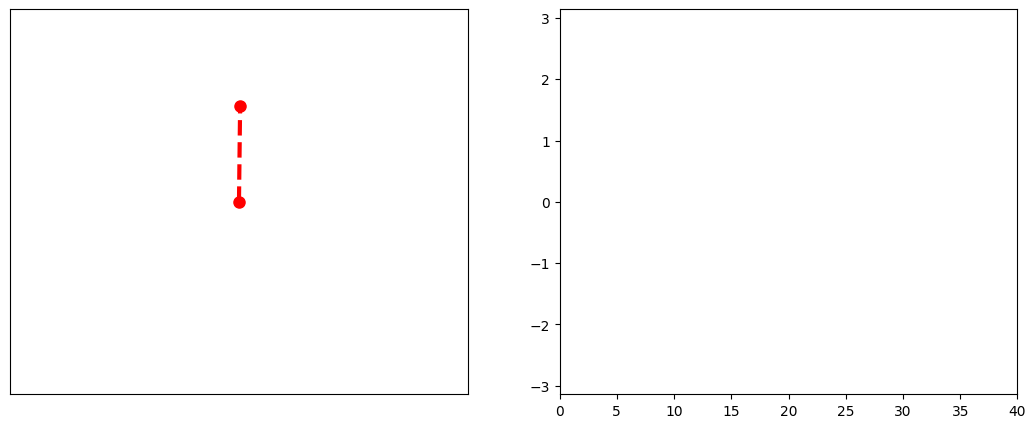

In [48]:
def animate(i):
    ln1.set_data([0, l_val * np.sin(theta[i])], [0, -l_val * np.cos(theta[i])])
    ln2.set_data(ts[:i], theta[:i])


fig, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
ln1, = axs[0].plot([], [], 'ro--', lw=3, ms=8)
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
ln2, = axs[1].plot([], [], '--')
axs[1].set_xlim(0, 40.)
axs[1].set_ylim(-np.pi, np.pi)

ani = FuncAnimation(fig, animate, frames=1000, interval=5)
ani.save('pend_ang_vel.gif', writer='pillow', fps=FRAMERATE)